ЗАДАНИЕ 1

Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print(tf.__version__)


# TensorFlow and tf.keras

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2.2.0


In [2]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [11]:
#28 X 28 - 1 значение
len(train_images[0])

28

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

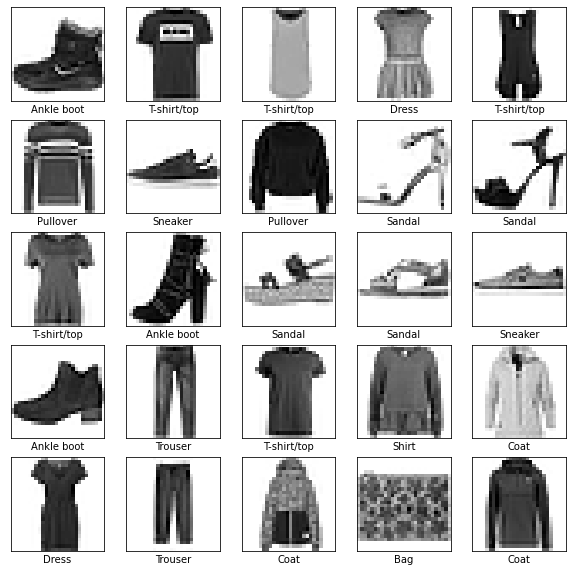

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
def create_model(inner_layers_count=1,neurons_count=128,epochs_count=3):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    for i in range(inner_layers_count):
        model.add(keras.layers.Dense(neurons_count, activation='relu'))
        
    model.add(keras.layers.Dense(10))
    

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=epochs_count)

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    #print('\nTest accuracy:', test_acc)

    probability_model = tf.keras.Sequential([model,
                                             tf.keras.layers.Softmax()])
    return probability_model,test_acc

In [15]:
probability_model1,test_acc=create_model()
predictions = probability_model1.predict(test_images)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4991 - accuracy: 0.8235
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3773 - accuracy: 0.8641
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3379 - accuracy: 0.8771
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 

In [16]:
test_acc

0.8654999732971191

In [17]:
predictions[0]

array([3.4778026e-05, 1.3642155e-08, 6.7843354e-07, 7.2353821e-08,
       2.2403279e-07, 7.9814777e-02, 2.5184181e-06, 9.1977157e-02,
       6.4828571e-05, 8.2810497e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
class_names[9]

'Ankle boot'

### Проверка предсказаний

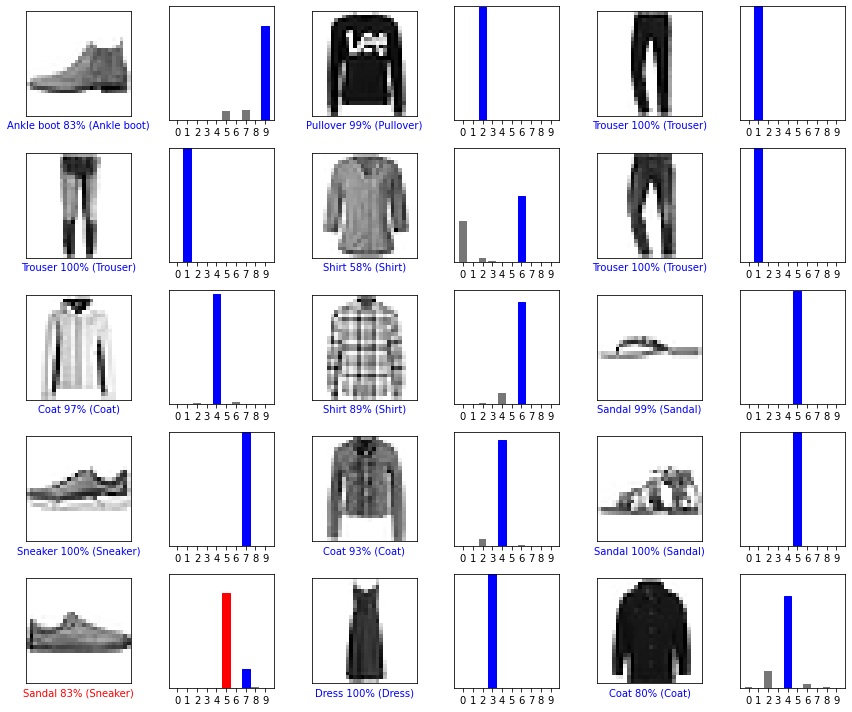

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [21]:
max_test_acc=0
inner_layers_counts=[1,2,5]
neurons_counts=[128,512,1024]
epochs_counts=[3,5,10]

max_inner_layers_count=0
max_neurons_count=0
max_epochs_count=0
max_predictions=[]

for inner_layers_count in inner_layers_counts:
    for neurons_count in neurons_counts:
        for epochs_count in epochs_counts:
            probability_model1,test_acc=create_model()
            predictions = probability_model1.predict(test_images)
            if test_acc > max_test_acc:
                max_test_acc=test_acc
                max_inner_layers_count=inner_layers_count
                max_neurons_count=neurons_count
                max_epochs_count=epochs_count
                max_predictions=predictions

                

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4999 - accuracy: 0.8246
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3774 - accuracy: 0.8658
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3363 - accuracy: 0.8776
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 

313/313 - 0s - loss: 0.3842 - accuracy: 0.8604
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the

1875/1875 [==============================] - 2s 1ms/step - loss: 0.5015 - accuracy: 0.8226: 0s - loss: 0.5023 - accuracy: 0.82
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3731 - accuracy: 0.8640
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3352 - accuracy: 0.8774
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3653 - accuracy: 0.8709
Please repor

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4953 - accuracy: 0.8243
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3717 - accuracy: 0.8669
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3351 - accuracy: 0.8770
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 

313/313 - 0s - loss: 0.4143 - accuracy: 0.8522
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3752 - accuracy: 0.8633
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.8763
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3595 - accuracy: 0.8721
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4935 - accuracy: 0.8271
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3745 - accuracy: 0.8651
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3381 - accuracy: 0.8768
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 

313/313 - 0s - loss: 0.3579 - accuracy: 0.8732
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3742 - accuracy: 0.8650
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3381 - accuracy: 0.8765
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3800 - accuracy: 0.8615
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the fu

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5030 - accuracy: 0.8217
Epoch 2/3
1875/1875 [==============================] - 2s 981us/step - loss: 0.3774 - accuracy: 0.8631
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3406 - accuracy: 0.8768
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

313/313 - 0s - loss: 0.3614 - accuracy: 0.8667
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
#параметры модели с наибольшей точностью
print(max_inner_layers_count)
print(max_neurons_count)
print(max_epochs_count)
print(max_test_acc)

5
128
3
0.873199999332428


In [23]:
probability_model1,test_acc=create_model(max_inner_layers_count,max_neurons_count,max_epochs_count)
predictions = probability_model1.predict(test_images)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5055 - accuracy: 0.8162
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3816 - accuracy: 0.8613
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.8740
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 

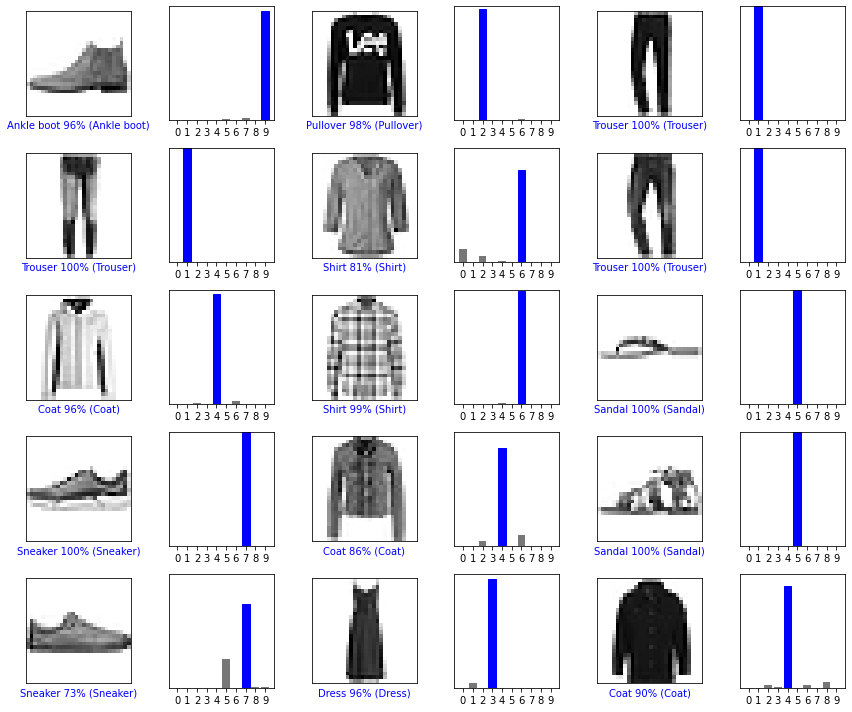

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Вывод: подбор параметров сети, таких, как число внутренних слоев, число нейронов в слоях, число эпох помогло улучшить точность прогноза сети.**

ЗАДАНИЕ 2

Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.

tf.estimator - высокоуровневое средство для работы с моделью, включает модули разных классификаторов, регрессоров и т д, например class LinearRegressor: An estimator for TensorFlow Linear regression problems.

tf.data.experimental- для построения конвеера обработки данных. Например, есть class DistributeOptions: Represents options for distributed data processing.